In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
 

### 2016 KDD Cup Selected Affiliations

- Affiliation ID
- Affiliation name

### 2016 KDD Cup Selected Papers

- Paper ID
- Original paper title
- Paper publish year
- Conference ID mapped to venue name
- Conference short name (abbreviation)

In [14]:
path_papers = "2016KDDCupSelectedPapers/2016KDDCupSelectedPapers.txt"
path_affiliations = "2016KDDCupSelectedAffiliations/2016KDDCupSelectedAffiliations.txt"

In [17]:
papers = pd.read_csv(path_papers, sep="\t", index_col=0, header=None, names=["title", "year", "confID", "confShort"])
affiliations = pd.read_csv(path_affiliations, sep="\t", index_col=0, header=None, names=["affID", "affName"])

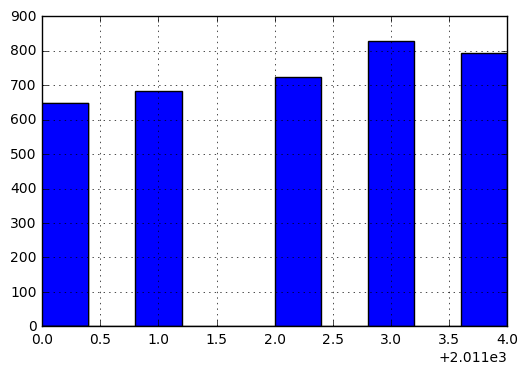

In [33]:
papers.year.hist()

In [34]:
papers.head()

,title,year,confID,confShort
7AB34E32,ADDiff: semantic differencing for activity dia...,2011,477F6C83,FSE
7BFD6C72,Boosting the performance of flow-sensitive poi...,2011,477F6C83,FSE
7DA0D7B5,BugCache for inspections: hit or miss?,2011,477F6C83,FSE
784EEC08,CSSL: a logic for specifying conditional scena...,2011,477F6C83,FSE
7A050622,Checking conformance of a producer and a consumer,2011,477F6C83,FSE


## NLP pre-process

In [53]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
import re
import stop_words

In [54]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words_ = stop_words.get_stop_words("en")

In [62]:
def nlp_pre_process(text):
    """
    Reduces an input text into a list of tokens, 
    using NLP filterings such as normalization, 
    PoS and stop word filtering, stemming.
    text: (str)
    tokens: list(str)
    """
    text = text.lower()  # normalize
    tokens = word_tokenize(text)  # tokenize
    pos_tags = [pos_tag([t]) for t in tokens]  # PoS tagging
    tokens = [token for [(token, tag)] in pos_tags if tag != "DT"]  # PoS filtering
    tokens = [t for t in tokens if t not in stop_words_]  # stop words filtering
    tokens = [stemmer.stem(t) for t in tokens]
    
    return " ".join(tokens)

In [63]:
nlp_pre_process(papers.title[4])

'check conform produc consum'

In [64]:
def nlp_pre_process_lemm(text):
    """
    Reduces an input text into a list of tokens, 
    using NLP filterings such as normalization, 
    PoS and stop word filtering, stemming.
    text: (str)
    tokens: list(str)
    """
    text = text.lower()  # normalize
    tokens = word_tokenize(text)  # tokenize
    pos_tags = [pos_tag([t]) for t in tokens]  # PoS tagging
    tokens = [[(token, tag)] for [(token, tag)] in pos_tags if tag != "DT"]  # PoS filtering
    tokens = [[(token, tag)] for [(token, tag)] in tokens if token not in stop_words_]  # stop words filtering
    tokens = [lemmatizer.lemmatize(token, tag) for [(token, tag)] in tokens]
    
    return " ".join(tokens)